In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score

from sklearn import metrics

Для лабораторной работы по визуализации взят набор данных **"Heart Disease Dataset"**.

Этот набор данных датируется 1988 годом и состоит из четырех баз данных: Cleveland, Hungary, Switzerland и Long Beach V. Он содержит 76 атрибутов, включая прогнозируемый атрибут, но все опубликованные эксперименты ссылаются на использование подмножества из 14 из них. Поле «target» относится к наличию у пациента заболевания сердца. Оно имеет целочисленное значение 0 = нет заболевания и 1 = заболевание.

In [116]:
url = 'https://raw.githubusercontent.com/KoJl9lH-59rus/ML_KT/refs/heads/main/%D0%9A%D0%A21/content/heart.csv'

dataset = pd.read_csv(url)

In [117]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


* **age**: возраст пациента.
* **sex**: пол пациента (1 = мужской, 0 = женский).
* **cp**: тип испытываемой боли в груди (от 0 до 3, что указывает на разные уровни тяжести).
* **trestbps**: артериальное давление пациента в состоянии покоя в мм рт. ст.
* **chol**: уровень холестерина в сыворотке пациента в мг/дл.
* **fbs**: указывает, превышает ли уровень сахара в крови пациента натощак 120 мг/дл (1 = правда, 0 = ложь).
* **restecg**: результаты ЭКГ (значения в диапазоне от 0 до 2, что указывает на разные результаты).
* **thalach**: максимальная частота сердечных сокращений, достигнутая во время тренировки.
* **exang**: указывает, испытывал ли пациент стенокардию во время физической нагрузки (1 = да, 0 = нет).
* **oldpeak**: депрессия, вызванная физической нагрузкой относительно покоя.
* **slope**: наклон пикового сегмента ST при физической нагрузке (значения варьируются от 0 до 2).
* **ca**: количество крупных сосудов (0–3), окрашенных с помощью флюороскопии.
* **thal**: статус заболевания крови (0 = норма, 1 = фиксированный дефект, 2 = обратимый дефект).
* **target**: указывает на наличие заболевания сердца (1 = заболевание сердца, 0 = нет заболевания сердца).

In [118]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [119]:
dataset.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


В датасете нет пустых и категориальных значений

In [148]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [74]:
# Замена категориальных данных

dataset = dataset.drop(['id'], axis=1)
dataset['ever_married'] = dataset['ever_married'].map({'Yes': 0, 'No': 1})
dataset['work_type'] = dataset['work_type'].map({'children': 0, 'Govt_job': 1, 'Never_worked': 2, 'Private': 3, 'Self-employed': 4})
dataset['Residence_type'] = dataset['Residence_type'].map({'Rural': 0, 'Urban': 1})
dataset['gender'] = dataset['gender'].map({'Male': 0, 'Female': 1, 'Other': 2})
dataset['smoking_status'] = dataset['smoking_status'].map({'formerly smoked': 0, 'never smoked': 1, 'smokes': 2, 'Unknown': 3})


In [75]:
def Evaluation_Metrics (model,X_train,y_train,X_test,y_test,y_pred):
    cv_score = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)

    r2 = model.score(X_test, y_test)
    n = X_test.shape[0]
    p = X_test.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    R2 = model.score(X_test, y_test)
    CV_R2 = cv_score.mean()

    print(f'RMSE:  {round(RMSE,4)}\n  R2: {round(R2,4)}\n Adjusted R2: {round(adjusted_r2, 4)}\n Cross Validated R2: {round(cv_score.mean(),4)}')
    return R2, adjusted_r2, CV_R2, RMSE

# Линейная регрессия

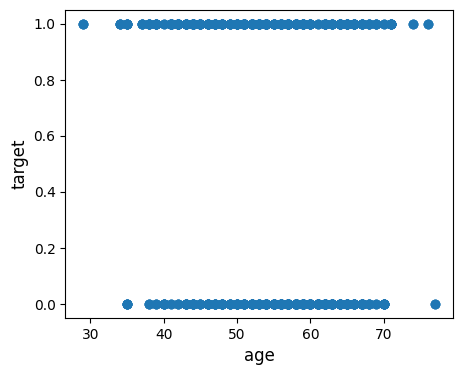

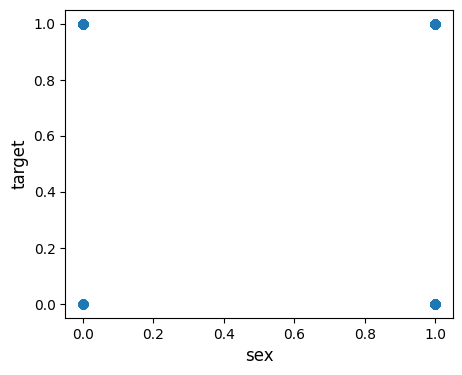

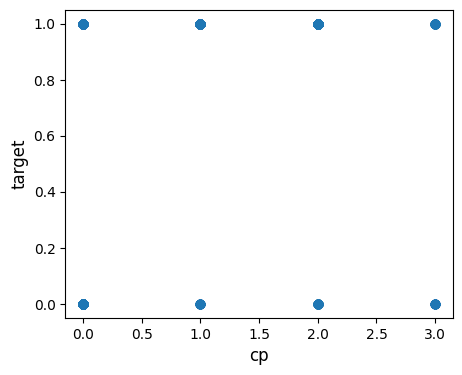

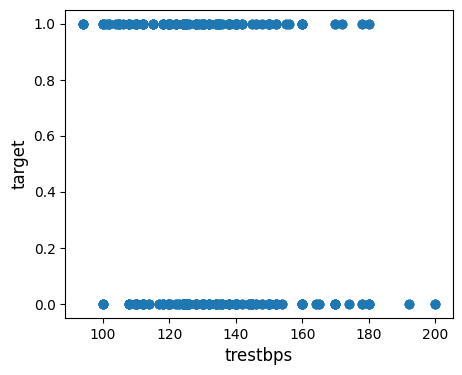

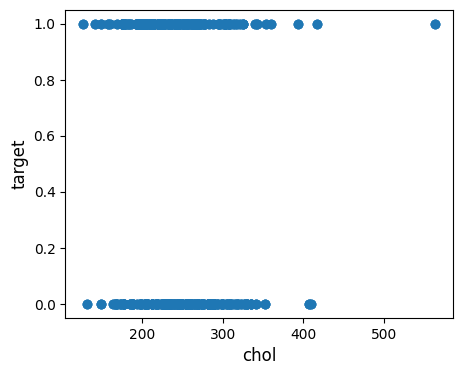

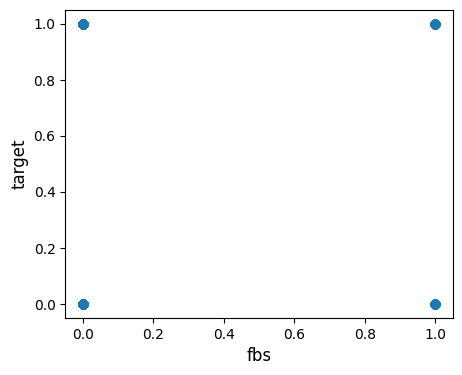

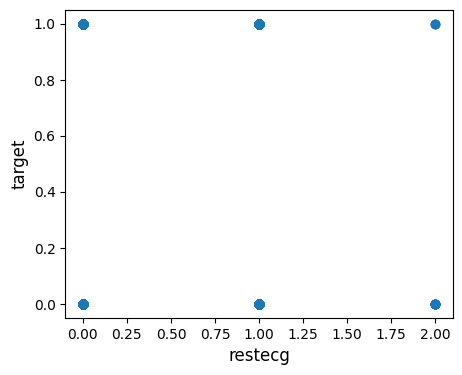

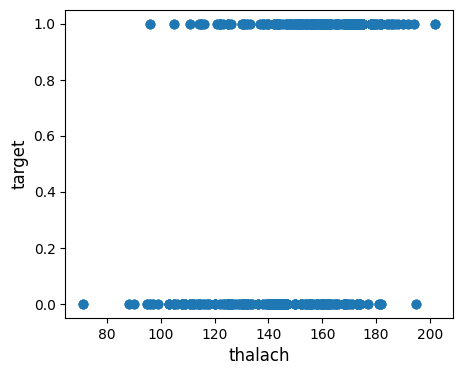

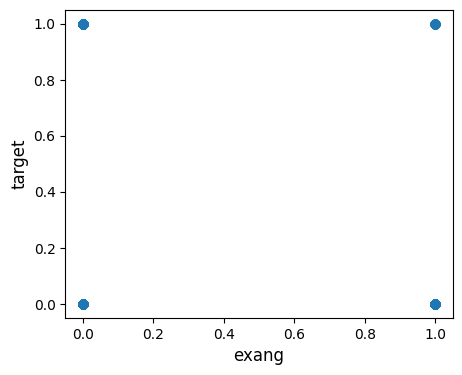

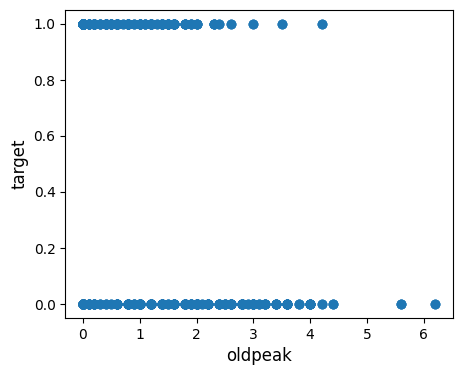

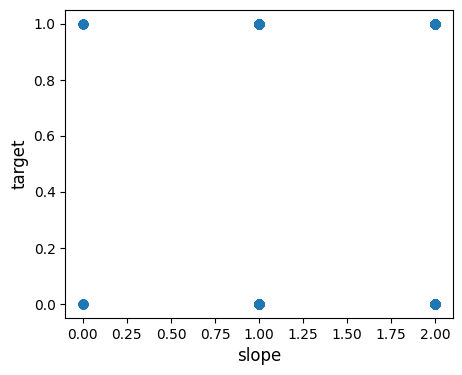

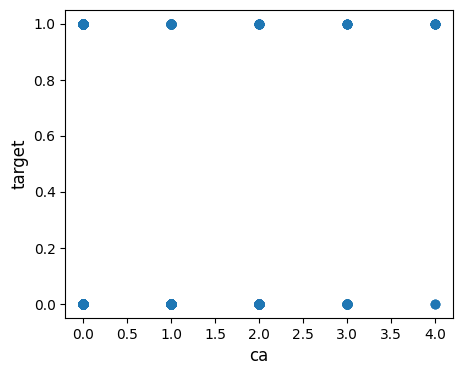

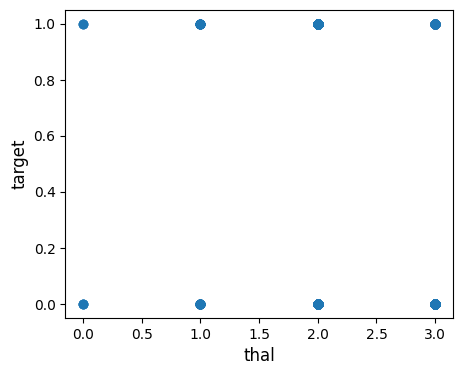

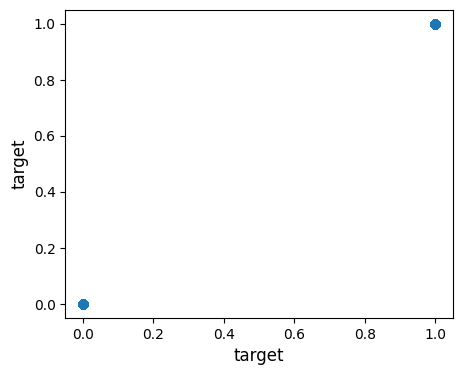

In [121]:
for index, feature_name in enumerate(dataset.columns):
    plt.figure(figsize=(5, 4))
    plt.scatter(dataset.values[:, index], dataset['target'])
    plt.ylabel('target', size=12)
    plt.xlabel(feature_name, size=12)
    plt.show()

In [127]:
# подготавливаем датасет к обучению

X = dataset.drop(['target'], axis=1)
y = dataset['target']

# делим датасет на трейн и тест

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=15)

In [128]:
from sklearn.linear_model import LinearRegression

modelLR = LinearRegression()
modelLR.fit(X_train, y_train)
y_pr_LR = modelLR.predict(X_test)



In [129]:
Evaluation_Metrics(modelLR, X_train, y_train, X_test, y_test, y_pr_LR)

RMSE:  0.3504
  R2: 0.5084
 Adjusted R2: 0.4749
 Cross Validated R2: 0.4914


(0.508359401837605,
 0.4748969527480179,
 0.4913705581981095,
 0.35038099216371504)

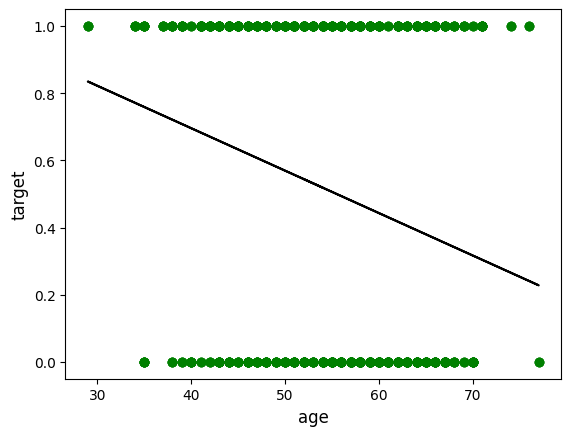

In [130]:
X2 = dataset['age'].values[:,np.newaxis]
# target data is array of shape (n,)
y2 = dataset['target'].values


model2 = LinearRegression()
model2.fit(X2, y2)

plt.scatter(X2, y2,color='g')
plt.plot(X2, model2.predict(X2),color='k')
plt.xlabel('age', size=12)
plt.ylabel('target', size=12)
plt.show()

# Полиноминальная регрессия

In [131]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3, include_bias=False)
poly_features = poly.fit_transform(X)

X_p_train, X_p_test, y_p_train, y_p_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)

In [132]:
modelPR = LinearRegression()

modelPR.fit(X_p_train, y_p_train)

y_pr_PR = modelPR.predict(X_p_test)

Evaluation_Metrics(modelPR, X_p_train, y_p_train, X_p_test, y_p_test, y_pr_PR)

RMSE:  4.6784
  R2: -86.6424
 Adjusted R2: 107.7707
 Cross Validated R2: -1.7757


(-86.64236309412311,
 107.77065662657061,
 -1.7756764923568216,
 4.678407199978698)

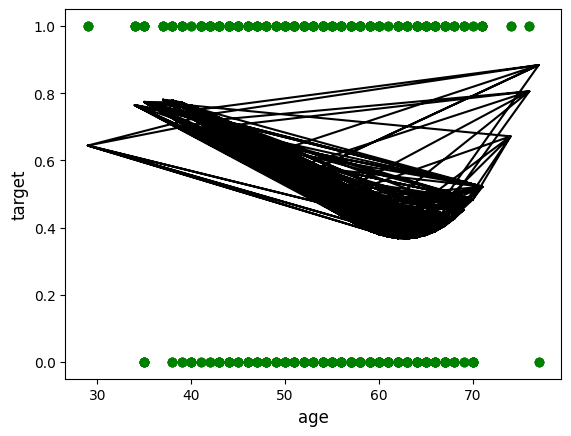

In [133]:
X2 = dataset['age'].values[:,np.newaxis]
y2 = dataset['target'].values

poly_features = poly.fit_transform(X2)

model2 = LinearRegression()
model2.fit(poly_features, y2)

plt.scatter(X2, y2,color='g')
plt.plot(X2, model2.predict(poly.fit_transform(X2)),color='k')
plt.xlabel('age', size=12)
plt.ylabel('target', size=12)
plt.show()

# Регрессия дерева принятия решений

In [134]:
from sklearn.tree import DecisionTreeRegressor

modelDT = DecisionTreeRegressor()

modelDT.fit(X_train, y_train)

y_dt_pred = modelDT.predict(X_test)

Evaluation_Metrics(modelDT, X_train, y_train, X_test, y_test, y_dt_pred)

RMSE:  0.0
  R2: 1.0
 Adjusted R2: 1.0
 Cross Validated R2: 0.9753


(1.0, 1.0, 0.9753255029751795, 0.0)

# Регрессия случайного леса

In [135]:
from sklearn.ensemble import RandomForestRegressor

modelRF = RandomForestRegressor(n_estimators=100)

modelRF.fit(X_train, y_train)

y_rf_pred = modelRF.predict(X_test)

Evaluation_Metrics(modelRF, X_train, y_train, X_test, y_test, y_rf_pred)

RMSE:  0.1016
  R2: 0.9586
 Adjusted R2: 0.9558
 Cross Validated R2: 0.9421


(0.9586346960167715,
 0.9558192564786461,
 0.9421473436969713,
 0.10163300788957752)

# Регрессия опорных векторов (SVR)

In [136]:
from sklearn.svm import SVR

modelSVR = SVR(kernel='linear')

modelSVR.fit(X_train, y_train)

y_rf_pred = modelSVR.predict(X_test)

Evaluation_Metrics(modelSVR, X_train, y_train, X_test, y_test, y_rf_pred)

RMSE:  0.3692
  R2: 0.4541
 Adjusted R2: 0.417
 Cross Validated R2: 0.4476


(0.45411384022712986,
 0.41695928484991884,
 0.4475964633001218,
 0.3692051162458906)

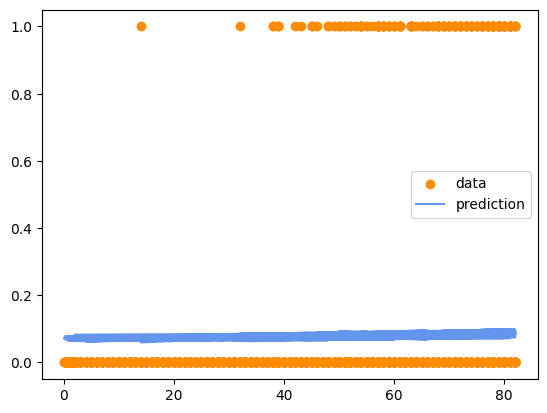

In [111]:
plt.scatter(X_train["age"], y_train, color='darkorange',
            label='data')
plt.plot(X_train["age"], modelSVR.predict(X_train), color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()

In [137]:
from sklearn.svm import SVR

modelSVR = SVR(kernel='poly')

modelSVR.fit(X_train, y_train)

y_rf_pred = modelSVR.predict(X_test)

Evaluation_Metrics(modelSVR, X_train, y_train, X_test, y_test, y_rf_pred)

RMSE:  0.4518
  R2: 0.1825
 Adjusted R2: 0.1268
 Cross Validated R2: 0.2105


(0.18248065913333078,
 0.12683798148271985,
 0.2105138106329699,
 0.4518202451435639)

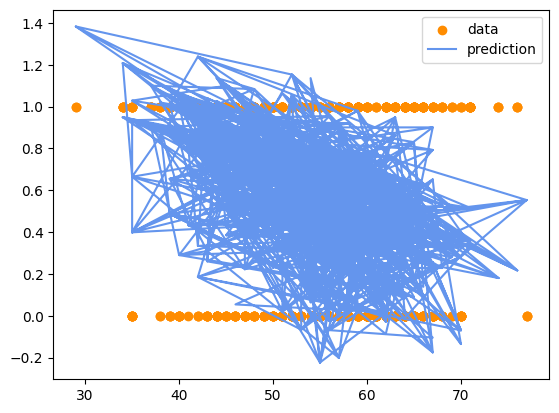

In [138]:
plt.scatter(X_train["age"], y_train, color='darkorange',
            label='data')
plt.plot(X_train["age"], modelSVR.predict(X_train), color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()

In [146]:
modelSVR = SVR(kernel='rbf')

modelSVR.fit(X_train, y_train)

y_rf_pred = modelSVR.predict(X_test)

Evaluation_Metrics(modelSVR, X_train, y_train, X_test, y_test, y_rf_pred)

RMSE:  0.4641
  R2: 0.1373
 Adjusted R2: 0.0786
 Cross Validated R2: 0.177


(0.13728540691855828,
 0.07856661262505704,
 0.17702728694893688,
 0.4641413285503144)

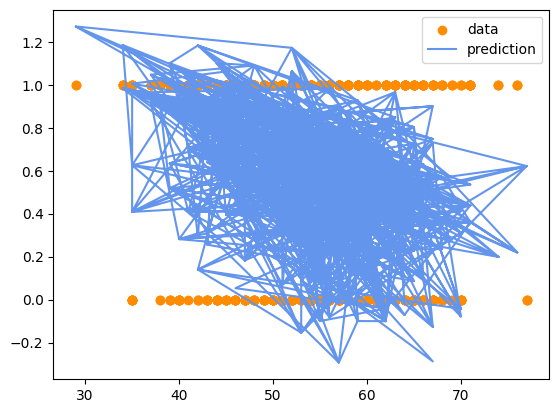

In [147]:
plt.scatter(X_train["age"], y_train, color='darkorange',
            label='data')
plt.plot(X_train["age"], modelSVR.predict(X_train), color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()

# Регрессия ElasticNet

In [144]:
from sklearn.linear_model import ElasticNet

modelEN = ElasticNet(alpha=0.1, l1_ratio=0.8)

modelEN.fit(X_train, y_train)

y_en_pred = modelEN.predict(X_test)

Evaluation_Metrics(modelEN, X_train, y_train, X_test, y_test, y_en_pred)

RMSE:  0.4077
  R2: 0.3344
 Adjusted R2: 0.2891
 Cross Validated R2: 0.3437


(0.3344326746537103,
 0.2891322807819733,
 0.3437323303591875,
 0.4076736722115993)

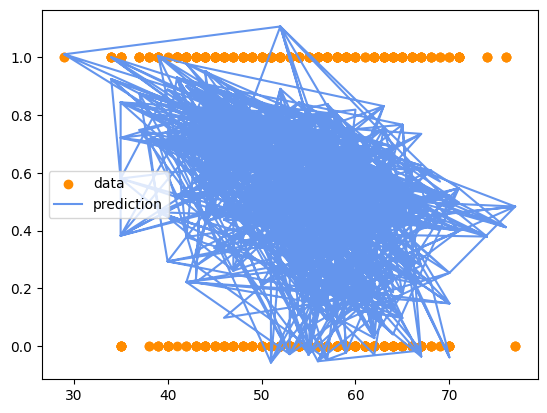

In [145]:
plt.scatter(X_train["age"], y_train, color='darkorange',
            label='data')
plt.plot(X_train["age"], modelEN.predict(X_train), color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()